# Lab 2

Student Name: Bilal Ahmed

Student ID: 500968598

Percentage of class 0: 65.36796536796537
Percentage of class 1: 34.63203463203463
Number of missing values: 0
Number of categorical variables: 1
Maximum correlation value: 1.0
Features with Maximum Correlation:
famhist_Absent   famhist_Present    1.000000
famhist_Present  famhist_Absent     1.000000
adiposity        obesity            0.716556
obesity          adiposity          0.716556
age              adiposity          0.625954
dtype: float64


<ipython-input-1-38a4365ce061>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_frame.corr()


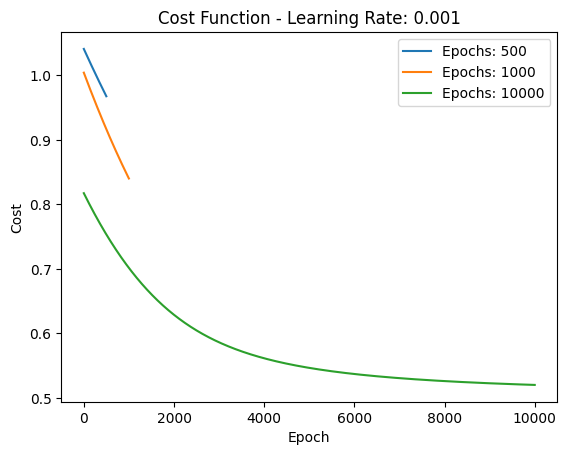

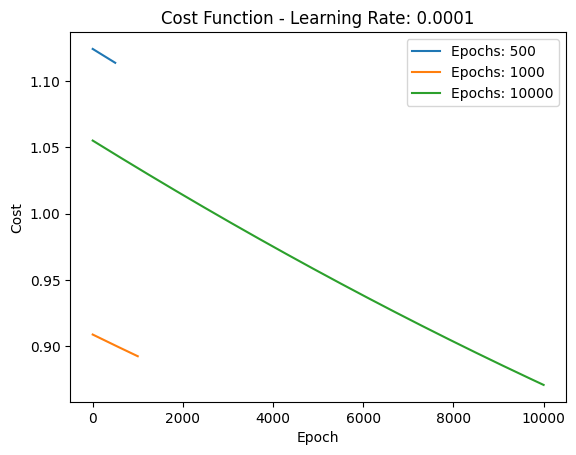

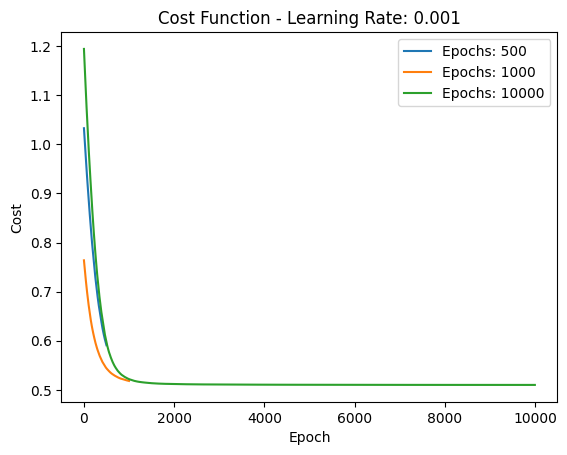

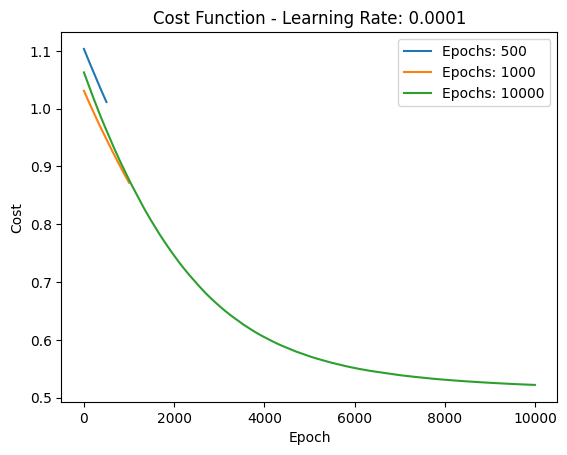

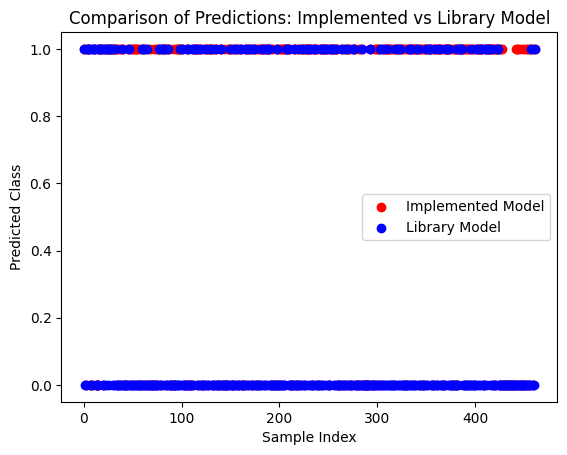

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Exploratory Data Analysis data:
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data_frame = pd.read_csv(data_url)


# Calculate and print the percentage of each class (0 and 1)
class_counts = data_frame['chd'].value_counts()
class_percentage = class_counts / data_frame.shape[0] * 100
print("Percentage of class 0:", class_percentage[0])
print("Percentage of class 1:", class_percentage[1])


# Determine the number of missing values
missing_values_count = data_frame.isnull().sum().sum()
print("Number of missing values:", missing_values_count)


# Count the number of categorical variables
categorical_columns = data_frame.select_dtypes(include='object').columns
num_categorical_variables = len(categorical_columns)
print("Number of categorical variables:", num_categorical_variables)


# Calculate the correlation matrix
correlation_matrix = data_frame.corr()
max_correlation_value = correlation_matrix.abs().max().max()
print("Maximum correlation value:", max_correlation_value)


# Encode categorical variables
encoded_data_frame = pd.get_dummies(data_frame, columns=categorical_columns)


# Normalize non-categorical features
non_categorical_columns = data_frame.columns.difference(categorical_columns)
normalized_data_frame = encoded_data_frame.copy()
normalized_data_frame[non_categorical_columns] = (encoded_data_frame[non_categorical_columns] - encoded_data_frame[non_categorical_columns].mean()) / encoded_data_frame[non_categorical_columns].std()


# Define the sigmoid function
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


# Define the binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
    return np.mean(loss)


# Define the function for updating the weights (thetas) iteratively
def update_weights(X, y, thetas, learning_rate):
    m = X.shape[0]
    X_with_bias = np.column_stack((np.ones((m, 1)), X))
    y_pred = sigmoid_function(np.dot(X_with_bias, thetas))
    gradient = np.dot(X_with_bias.T, y_pred - y) / m
    thetas -= learning_rate * gradient
    return thetas


# Calculate the correlation matrix for normalized data
correlation_matrix_normalized = normalized_data_frame.corr()


# Print features with maximum correlation
max_correlated_features = correlation_matrix_normalized.abs().unstack().sort_values(ascending=False)
max_correlated_features = max_correlated_features[max_correlated_features != 1.0]
print("Features with Maximum Correlation:")
print(max_correlated_features.head())


# Convert X and y to numpy arrays
X = normalized_data_frame.drop('chd', axis=1).values
y = data_frame['chd'].values


# Initialize random values for theta coefficients
thetas = np.random.rand(X.shape[1] + 1)  # +1 for the bias term


# Plot the cost function for different learning rates
epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]

for lr in learning_rates:
    for epoch in epochs:
        # Initialize random values for theta coefficients for each graph
        thetas = np.random.rand(X.shape[1] + 1)  # +1 for the bias term

        costs = []
        for i in range(epoch):
            thetas = update_weights(X, y, thetas, lr)
            X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
            y_pred = sigmoid_function(np.dot(X_with_bias, thetas))
            cost = binary_cross_entropy(y, y_pred)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()


# Perform mini-batch gradient descent
epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]
batch_size = 50

num_batches = X.shape[0] // batch_size

for lr in learning_rates:
    for epoch in epochs:
        thetas = np.random.rand(X.shape[1] + 1)

        costs = []
        for i in range(epoch):
            for batch in range(num_batches):
                batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                thetas = update_weights(X_batch, y_batch, thetas, lr)

            X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
            y_pred = sigmoid_function(np.dot(X_with_bias, thetas))
            cost = binary_cross_entropy(y, y_pred)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()


# Compare with implemented library
X = normalized_data_frame.drop('chd', axis=1)
y = data_frame['chd'].values

thetas = np.random.rand(X.shape[1] + 1)
X_with_bias = np.column_stack((np.ones((X.shape[0], 1)), X))
lr_model_implemented = sigmoid_function(np.dot(X_with_bias, thetas)) >= 0.5

lr_model_library = LogisticRegression(random_state=0)
lr_model_library.fit(X, y)

implemented_predictions = lr_model_implemented.astype(int)
library_predictions = lr_model_library.predict(X)

fig, ax = plt.subplots()

ax.scatter(range(len(implemented_predictions)), implemented_predictions, color='red', label='Implemented Model')

ax.scatter(range(len(library_predictions)), library_predictions, color='blue', label='Library Model')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Predicted Class')
ax.set_title('Comparison of Predictions: Implemented vs Library Model')

ax.legend()

plt.show()


**Part B**

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class XORNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases with random values
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))

        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_layer = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)
        return self.output_layer

    def backward(self, X, y, learning_rate):
        # Backpropagation
        delta_output = (self.output_layer - y) * sigmoid_derivative(self.output_layer)
        delta_hidden = np.dot(delta_output, self.weights2.T) * sigmoid_derivative(self.hidden_layer)

        self.weights2 -= learning_rate * np.dot(self.hidden_layer.T, delta_output)
        self.bias2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)

        self.weights1 -= learning_rate * np.dot(X.T, delta_hidden)
        self.bias1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward propagation
            self.forward(X)
            self.backward(X, y, learning_rate)

            # Calculate and print loss at every 100 epochs
            if epoch % 100 == 0:
                loss = self.loss(X, y)
                print(f"Epoch: {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        # Predict output for input X
        return self.forward(X)

    def loss(self, X, y):
        # Calculate mean squared error loss
        predictions = self.forward(X)
        return np.mean((predictions - y) ** 2)

# Define the XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create an instance of the XOR neural network
model = XORNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
model.train(X, y, epochs=1000, learning_rate=0.1)

# Predict the output for the XOR inputs
predictions = model.predict(X)
print("Predictions:")
print(predictions)


Epoch: 0, Loss: 0.2836
Epoch: 100, Loss: 0.2507
Epoch: 200, Loss: 0.2506
Epoch: 300, Loss: 0.2505
Epoch: 400, Loss: 0.2505
Epoch: 500, Loss: 0.2504
Epoch: 600, Loss: 0.2504
Epoch: 700, Loss: 0.2503
Epoch: 800, Loss: 0.2503
Epoch: 900, Loss: 0.2503
Predictions:
[[0.4821936 ]
 [0.48551874]
 [0.51294436]
 [0.51622094]]
